## Tutoriel : interagir avec le système de stockage S3 du SSP Cloud (MinIO)

In [3]:
import os

import pandas as pd
import numpy as np
import s3fs
import zipfile

### Récupérer les données d'un challenge

In [4]:
# Create filesystem object
S3_ENDPOINT_URL = "https://" + os.environ["AWS_S3_ENDPOINT"]
fs = s3fs.S3FileSystem(client_kwargs={'endpoint_url': S3_ENDPOINT_URL})

In [5]:
# Télécharger les données dans le service
PATH_IN = 'samicarret/diffusion/TreatedRoomSmallSet2.zip'
fs.download(PATH_IN, 'data/HC3.zip')

[None]

In [6]:
# Décompresser les données
with zipfile.ZipFile("data/HC3.zip","r") as zip_file:
    zip_file.extractall("data/")

### Lecture des fichiers

In [7]:
file = np.load('data/TreatedRoomSmallSet/Human1/centroid.npy')

In [8]:
file

array([[ 2425.77063278,  -657.46941402],
       [ 1744.17081831,  -944.2440339 ],
       [ 2320.19919293, -2464.72205234]])

In [10]:
audio = np.load('data/TreatedRoomSmallSet/Human1/audio.npy')
adjusted_audio = np.load('data/TreatedRoomSmallSet/Human1/adjusted_audio.npy')

deconvolved = np.load('data/TreatedRoomSmallSet/Human1/deconvolved.npy')
directlines = np.load('data/TreatedRoomSmallSet/Human1/directlines.npy')


In [11]:
rms_audio = np.sqrt(np.mean(np.square(audio), axis=2))  # Calculer RMS sur l'axe des échantillons

# Vérifier la forme des niveaux RMS
print("Shape des niveaux RMS:", rms_audio.shape)  # [N_datapoints, N_Microphones]

# Exemple : Niveaux RMS pour le premier enregistrement
print("Niveaux RMS pour le premier enregistrement:")
print(rms_audio[0])  # Afficher les niveaux RMS du premier enregistrement


Shape des niveaux RMS: (3, 10)
Niveaux RMS pour le premier enregistrement:
[29.70875137 29.20671747 25.63379974 23.46920801 24.2696896  27.74678054
 20.81851468 25.1604534  24.41105036 31.64709987]


In [13]:
# Concaténer les niveaux RMS avec les positions de centroid
data_with_positions = np.concatenate((rms_audio, file), axis=1)

# Vérifier la forme du tableau combiné
print("Shape du tableau combiné:", data_with_positions.shape)  # [N_datapoints, N_Microphones + 2]

# Vérifier les premières lignes du tableau
print("Premières lignes du tableau combiné:")
print(data_with_positions[:5])  # Afficher les premières lignes pour vérification


Shape du tableau combiné: (3, 12)
Premières lignes du tableau combiné:
[[   29.70875137    29.20671747    25.63379974    23.46920801
     24.2696896     27.74678054    20.81851468    25.1604534
     24.41105036    31.64709987  2425.77063278  -657.46941402]
 [   31.34640352    29.93810895    30.00472626    24.26575375
     31.04475679    29.63319339    22.08850504    27.39462351
     26.56226851    38.20548557  1744.17081831  -944.2440339 ]
 [   34.85986726    29.18252056    25.56728984    24.03735916
     23.73848728    27.03857834    22.23435472    25.80769672
     23.98810621    32.3542175   2320.19919293 -2464.72205234]]


In [14]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Charger les données nécessaires (audio.npy et centroid.npy)
audio = np.load('data/TreatedRoomSmallSet/Human1/audio.npy')
centroid = np.load('data/TreatedRoomSmallSet/Human1/centroid.npy')

# Calculer les niveaux RMS pour chaque enregistrement pour les 4 micros
rms_audio = np.sqrt(np.mean(np.square(audio), axis=2))

# Concaténer les niveaux RMS avec les positions de centroid
data_with_positions = np.concatenate((rms_audio, centroid), axis=1)

# Vérifier la forme du tableau combiné
print("Shape du tableau combiné:", data_with_positions.shape)  # [N_datapoints, N_Microphones + 2]

# Vérifier les premières lignes du tableau
print("Premières lignes du tableau combiné:")
print(data_with_positions[:5])  # Afficher les premières lignes pour vérification


Shape du tableau combiné: (3, 12)
Premières lignes du tableau combiné:
[[   29.70875137    29.20671747    25.63379974    23.46920801
     24.2696896     27.74678054    20.81851468    25.1604534
     24.41105036    31.64709987  2425.77063278  -657.46941402]
 [   31.34640352    29.93810895    30.00472626    24.26575375
     31.04475679    29.63319339    22.08850504    27.39462351
     26.56226851    38.20548557  1744.17081831  -944.2440339 ]
 [   34.85986726    29.18252056    25.56728984    24.03735916
     23.73848728    27.03857834    22.23435472    25.80769672
     23.98810621    32.3542175   2320.19919293 -2464.72205234]]


In [19]:
import os

# Créer le dossier data s'il n'existe pas
if not os.path.exists('data'):
    os.makedirs('data')

In [20]:
import numpy as np

# Charger les données nécessaires (audio.npy et centroid.npy)
audio = np.load('data/TreatedRoomSmallSet/Human1/audio.npy')
centroid = np.load('data/TreatedRoomSmallSet/Human1/centroid.npy')

# Calculer les niveaux RMS pour chaque enregistrement pour les 4 micros
rms_audio = np.sqrt(np.mean(np.square(audio), axis=2))

# Concaténer les niveaux RMS avec les positions de centroid
data_with_positions = np.concatenate((rms_audio, centroid), axis=1)

# Sauvegarder les données combinées dans le dossier "data"
np.save('data/donnees_combinees.npy', data_with_positions)


In [6]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Charger les données combinées (niveaux RMS et positions) depuis le dossier "data"
data_with_positions = np.load('data/donnees_combinees.npy')

# Séparer les features (niveaux RMS) et les labels (positions)
X = data_with_positions[:, :4]  # Les 4 premières colonnes sont les features (niveaux RMS)
y = data_with_positions[:, 4:]  # Les colonnes suivantes sont les labels (positions)

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Créer un modèle de régression linéaire
model = LinearRegression()

# Entraîner le modèle sur l'ensemble d'entraînement
model.fit(X_train, y_train)

# Prédire les positions sur l'ensemble de test
y_pred = model.predict(X_test)

# Calculer l'erreur moyenne quadratique (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE):", rmse)

# Exemple de prédiction pour une nouvelle donnée (pour illustrer)
nouvelle_donnee = np.array([[30.0, 28.0, 26.0, 24.0]])  # Nouveaux niveaux RMS à prédire
prediction = model.predict(nouvelle_donnee)
print("Prédiction de la position pour les niveaux RMS :", prediction)

# Sauvegarder le modèle entraîné si nécessaire
# from joblib import dump
# dump(model, 'modele_de_regression.joblib')


Root Mean Squared Error (RMSE): 225.58790131150187
Prédiction de la position pour les niveaux RMS : [[  30.39965014   32.66303892   19.03932157   27.20772662   26.55977958
    38.11476921 1970.49231441 -980.28317514]]


In [24]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline

# Créer un pipeline avec PolynomialFeatures et Ridge Regression
model = make_pipeline(
    PolynomialFeatures(degree=2, include_bias=False),
    Ridge(alpha=0.1)
)

# Entraîner le modèle sur l'ensemble d'entraînement
model.fit(X_train, y_train)

# Prédire les positions sur l'ensemble de test
y_pred = model.predict(X_test)

# Calculer l'erreur moyenne quadratique (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE) après amélioration:", rmse)


Root Mean Squared Error (RMSE) après amélioration: [747.79629915]


PolynomialFeatures :
Crée de nouvelles caractéristiques en combinant les niveaux RMS de manière à capturer des relations plus complexes entre les données.

Ridge Regression :
Permet de mieux gérer les relations complexes en ajoutant une régularisation qui évite le surajustement.
Ce que le Code Fait :
Il transforme les données d'entraînement en caractéristiques polynomiales.
Entraîne un modèle de régression linéaire avec régularisation Ridge sur ces nouvelles caractéristiques.
Prédit les positions à partir des niveaux RMS pour les données de test.
Calcule l'erreur (RMSE) pour évaluer la performance du modèle.

Résumé :
Le code améliore la régression linéaire en lui permettant de mieux capturer les relations complexes entre les niveaux RMS et les positions grâce à l'ajout de caractéristiques polynomiales et à la régularisation Ridge. Cela devrait conduire à des prédictions plus précises et à un modèle moins sensible au surajustement.









In [2]:
pip install tensorflow


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.4/45.4 kB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 2.3 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.7/133.7 kB 32.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 21.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 82.5 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 79.2 MB/s eta 0:00:00ta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 98.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 71.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 84.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 22.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 92.4 MB/s eta 0:00:00ta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 89.9 MB/s eta 0:00:00ta 0:00:0

In [3]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, LSTM, Dense, Concatenate, Flatten
from sklearn.model_selection import train_test_split

2024-04-23 12:44:01.709345: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-23 12:44:01.714506: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-23 12:44:01.770504: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-23 12:44:02.824532: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [9]:
audio = np.load('data/TreatedRoomSmallSet/Human1/audio.npy')
centroid = np.load('data/TreatedRoomSmallSet/Human1/centroid.npy')
skeletons = np.load('data/TreatedRoomSmallSet/Human1/skeletons.npy')
rms_audio = np.sqrt(np.mean(np.square(audio), axis=2))

# Normaliser les données audio (optionnel mais souvent utile)
rms_audio = (rms_audio - np.mean(rms_audio, axis=0)) / np.std(rms_audio, axis=0)

# Diviser les données en ensembles d'entraînement et de test
X_audio_train, X_audio_test, X_skeletons_train, X_skeletons_test, y_train, y_test = train_test_split(
    rms_audio, skeletons, centroid, test_size=0.2, random_state=42
)

In [12]:
import numpy as np

# Charger les données audio et centroid
audio = np.load('data/TreatedRoomSmallSet/Human1/audio.npy')
centroid = np.load('data/TreatedRoomSmallSet/Human1/centroid.npy')

# Calculer les niveaux RMS pour chaque enregistrement pour les 4 micros
rms_audio = np.sqrt(np.mean(np.square(audio), axis=2))

# Vérifier la forme de rms_audio
print("Shape de rms_audio:", rms_audio.shape)


Shape de rms_audio: (3, 10)


In [14]:
import numpy as np
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, LSTM, Dense, Reshape

# Charger les données audio et centroid
audio = np.load('data/TreatedRoomSmallSet/Human1/audio.npy')
centroid = np.load('data/TreatedRoomSmallSet/Human1/centroid.npy')

# Calculer les niveaux RMS pour chaque enregistrement pour les 4 micros
rms_audio = np.sqrt(np.mean(np.square(audio), axis=2))

# Entrée pour les niveaux RMS des micros
input_audio = Input(shape=(rms_audio.shape[1],), name='input_audio')

# Reshape pour ajouter une dimension (1D pour Conv1D)
reshaped_audio = Reshape((rms_audio.shape[1], 1))(input_audio)

# Couches Convolutionnelles pour l'audio
conv1 = Conv1D(32, 3, activation='relu', padding='same')(reshaped_audio)
maxpool1 = MaxPooling1D(2)(conv1)
conv2 = Conv1D(64, 3, activation='relu', padding='same')(maxpool1)
maxpool2 = MaxPooling1D(2)(conv2)

# Couche LSTM pour la fusion temporelle
lstm_fusion = LSTM(128, return_sequences=False)(maxpool2)

# Couche Dense pour la prédiction de la localisation
output = Dense(2, activation='linear', name='output')(lstm_fusion)

# Créer le modèle
model = Model(inputs=input_audio, outputs=output)

# Compiler le modèle avec la fonction de perte appropriée
model.compile(optimizer='adam', loss='mse')

# Afficher un résumé du modèle
model.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_audio (InputLayer)        │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 10, 1)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ (None, 10, 32)         │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 5, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 5, 64)          │         6,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 2, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 128)            │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 105,410 (411.76 KB)

 Trainable params: 105,410 (411.76 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
# Entraîner le modèle
history = model.fit(
    X_audio_train, y_train,
    validation_data=(X_audio_test, y_test),
    epochs=10, batch_size=32
)


Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 3847904.7500 - val_loss: 3158178.7500
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step - loss: 3847706.5000 - val_loss: 3158049.5000
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - loss: 3847507.0000 - val_loss: 3157915.0000
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - loss: 3847300.0000 - val_loss: 3157770.7500
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step - loss: 3847079.5000 - val_loss: 3157613.2500
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - loss: 3846839.0000 - val_loss: 3157438.0000
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - loss: 3846571.5000 - val_loss: 3157240.2500
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - loss: 3846271.5000 - val_loss: 3157014.2500
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - loss: 3845932.5000 - val_loss: 3156755.2500
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - loss: 3845546.0000 - val_loss: 3156458.0000


In [26]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Fonction pour créer le modèle
def create_model():
    model = Sequential([
        Dense(32, activation='relu', input_shape=(4,)),
        Dense(16, activation='relu'),
        Dense(2)  # 2 sorties pour les positions x et y
    ])
    return model

# Créer le modèle
model = create_model()

# Compiler le modèle avec un taux d'apprentissage réduit
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mse')


/opt/mamba/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [27]:
# Entraîner le modèle avec plus d'époques et validation
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=50, batch_size=32
)


Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 836ms/step - loss: 3813142.2500 - val_loss: 3146071.5000
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - loss: 3811064.0000 - val_loss: 3144527.0000
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - loss: 3808991.0000 - val_loss: 3143011.2500
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 3806911.7500 - val_loss: 3141492.2500
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - loss: 3804826.5000 - val_loss: 3139971.2500
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - loss: 3802734.5000 - val_loss: 3138446.7500
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - loss: 3800628.7500 - val_loss: 3136925.0000
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - loss: 3798568.5000 - val_loss: 3135407.5000
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - loss: 3796500.7500 - val_loss: 3133894.5000
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - loss: 3794357.0000 - val_loss: 3132510.2500
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/ste

In [28]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Créer un modèle de réseau de neurones profond
model = Sequential([
    Dense(64, activation='relu', input_shape=(4,)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(2)  # 2 sorties pour les positions x et y
])

# Compiler le modèle avec un taux d'apprentissage réduit
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mse')

# Entraîner le modèle avec plus d'époques et validation
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=50, batch_size=32
)


Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 3861572.0000 - val_loss: 3167674.0000
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - loss: 3857250.0000 - val_loss: 3163801.2500
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - loss: 3852958.0000 - val_loss: 3160244.7500
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - loss: 3848841.7500 - val_loss: 3156787.0000
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - loss: 3844883.0000 - val_loss: 3153323.5000
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - loss: 3840924.0000 - val_loss: 3149857.0000
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - loss: 3836968.2500 - val_loss: 3146385.7500
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - loss: 3833012.7500 - val_loss: 3142907.5000
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - loss: 3829479.5000 - val_loss: 3140233.2500
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - loss: 3827282.0000 - val_loss: 3138001.7500
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step 

In [29]:
# Évaluer le modèle sur les données de test
test_loss = model.evaluate(X_test, y_test)
print("Loss sur les données de test :", test_loss)

# Prédiction sur une nouvelle donnée
nouvelle_donnee = np.array([[30.0, 28.0, 26.0, 24.0]])  # Nouveaux niveaux RMS à prédire
prediction = model.predict(nouvelle_donnee)
print("Prédiction de la position pour les niveaux RMS :", prediction)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 2958772.0000
Loss sur les données de test : 2958772.0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
Prédiction de la position pour les niveaux RMS : [[ 71.65536 -43.78367]]


Le "Loss sur les données de test" est de 2958772.0. Cela représente la moyenne des erreurs au carré entre les positions réelles et les positions prédites sur les données de test. Plus le Loss est bas, mieux le modèle performe. Cela montre que le modèle a atteint un Loss de 2958772.0 sur les données de test.

In [30]:
from sklearn.metrics import mean_squared_error

# Calculer les prédictions sur les données de test
y_pred = model.predict(X_test)

# Calculer le RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE) sur les données de test:", rmse)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Root Mean Squared Error (RMSE) sur les données de test: 1720.1081372516912


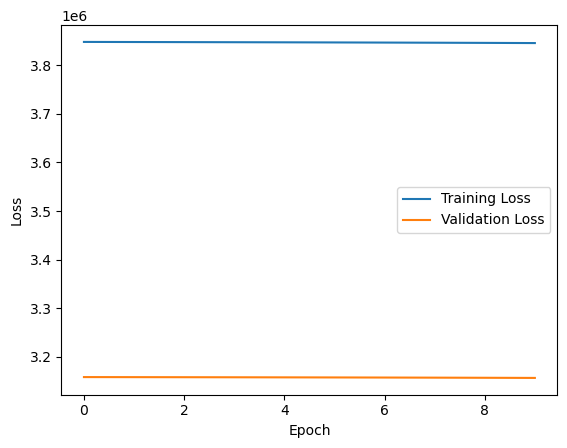

In [17]:
import matplotlib.pyplot as plt

# Afficher la courbe de perte pendant l'entraînement
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [18]:
# Sauvegarder le modèle
model.save('model_crnn_acoustic.h5')

# Pour charger le modèle plus tard
# from tensorflow.keras.models import load_model
# loaded_model = load_model('model_crnn_acoustic.h5')
